In [29]:
import pandas as pd
import time
from datetime import date as dt
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [25]:
data_url = 'https://finviz.com/quote.ashx?t={ticker}'
tickers = ['AMZN', 'AAPL', 'META']
news_tables = {}
vader = SentimentIntensityAnalyzer()

In [26]:
for ticker in tickers:
    req = Request(url=data_url.format(ticker=ticker), headers={'user-agent':'my-app'})
    response = urlopen(req)
    
    html = BeautifulSoup(response, 'html')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

In [27]:
amzn_data = news_tables['AMZN']
amzn_rows = amzn_data.findAll('tr')
for index, row in enumerate(amzn_rows):
    title = row.a.get_text
    timestamp = row.td.get_text

In [28]:
parsed_data = []

for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        title = row.a.get_text()
        date_data = row.td.text.strip().split(' ')
        
        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]
            
        parsed_data.append([ticker, date, time, title])

In [35]:
data_df = pd.DataFrame(parsed_data, columns=['Ticker', 'Date', 'Time', 'Title'])
curr_date = dt.today()
data_df['Date'] = data_df['Date'].replace("Today", str(curr_date.strftime("%b-%d-%y")))
data_df['Date'] = pd.to_datetime(data_df['Date'], format='%b-%d-%y')
data_df['Time'] = pd.to_datetime(data_df['Time'], format='%I:%M%p')
f = lambda x: vader.polarity_scores(x)['compound']
data_df['Compound'] = data_df['Title'].apply(f)
data_df

,Ticker,Date,Time,Title,Compound
0,AMZN,2024-05-24,1900-01-01 12:00:00,Amazon Opens New Robotics Fulfilment Centre in...,0.1779
1,AMZN,2024-05-24,1900-01-01 11:53:00,Is Broadcom Inc. (NASDAQ:AVGO) The Best Tech D...,0.6369
2,AMZN,2024-05-24,1900-01-01 11:39:00,"Amazon is slashing prices on 4,000 grocery ite...",-0.1027
3,AMZN,2024-05-24,1900-01-01 10:30:00,"Amazon Pumps Cash into Fulfillment Centers, Re...",0.4215
4,AMZN,2024-05-24,1900-01-01 09:46:00,Here's Why Jim Cramer is Bearish on Under Armo...,0.0000
...,...,...,...,...,...
295,META,2024-05-16,1900-01-01 16:16:00,Brace for a Market Crash With These 3 (Surpris...,-0.4019
296,META,2024-05-16,1900-01-01 15:15:00,"Dow Jones breaches 40,000, Walmart earnings, M...",0.0000
297,META,2024-05-16,1900-01-01 14:30:00,Stream Dream Team: 3 Media Stocks Conquering t...,0.2500
298,META,2024-05-16,1900-01-01 14:01:00,David Rolfe's Strategic Shifts in Q1 2024: A C...,0.0000


In [36]:
mean_df = data_df[['Ticker', 'Date', 'Compound']].groupby(['Ticker', 'Date']).mean()
mean_df = mean_df.unstack()
mean_df = mean_df.xs('Compound', axis='columns').transpose()
mean_df

Ticker,AAPL,AMZN,META
Date,,,
2024-05-16,NaN,NaN,0.024017
2024-05-17,NaN,NaN,0.177664
2024-05-18,NaN,NaN,0.177580
2024-05-19,NaN,NaN,0.236013
2024-05-20,0.000000,NaN,0.308056
2024-05-21,0.062250,0.162476,0.161483
2024-05-22,0.148662,0.073851,0.111650
2024-05-23,0.175867,0.240397,0.304355
2024-05-24,0.203429,0.150575,0.074608


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x800 with 0 Axes>

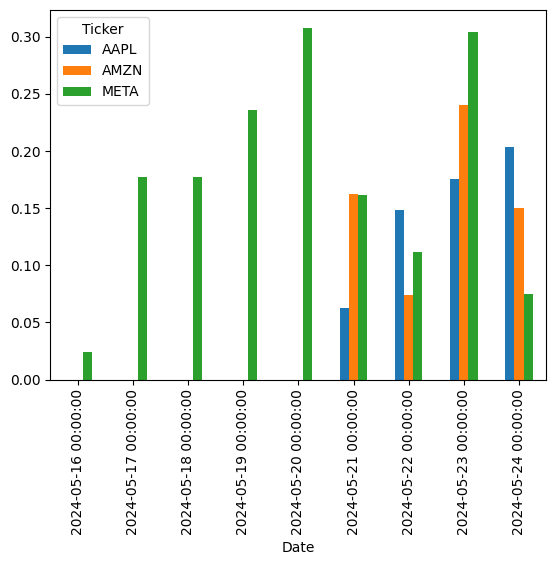

In [37]:
plt.figure(figsize=(10,8))
mean_df.plot(kind='bar')
plt.show